# **Modelos lineales**
------

## Regresión lineal, método directo (OLS)

### Programación de la solución directa

Partimos del dataset de ejemplo que se utilizó en los apuntes: edad vs salario:

In [1]:
import numpy as np
x = np.array([21, 25, 26, 29, 30, 30, 31, 37, 38, 40, 44, 47, 50, 55, 58, 61])
X = x.reshape((-1, 1))
y = np.array([22000, 30000, 25000, 24000, 28000, 33000, 26000, 35000, 52000, 36000, 55000, 69000, 42000, 80000, 65000, 85000])

Lo primero es pintar los datos para hacernos una idea de si es buena idea intentar aproximarlos con una línea recta:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


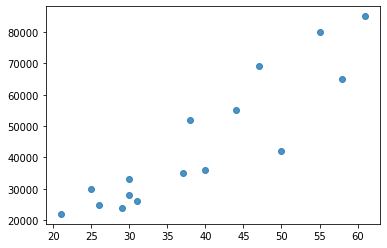

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(X, y, fit_reg=False)

En principio parece que sí podría ser factible, ya que se ve una relación (más o menos) lineal entre las dos variables.

Intenta programar el método directo de Ordinary Least Squares. Recuerda que un vector columna de unos se declara así:

In [3]:
ones = np.ones((len(X), 1))

y que se puede pegar los unos como primera columna a X así:

In [4]:
X = np.append(ones, X, axis=1)

Partiendo de aquí, y teniendo presente que el operador multiplicación de matrices es la @, calcula Beta y las predicciones del modelo a partir de las X:

In [5]:
X1 = np.linalg.inv(X.T @ X)
X1

array([[ 7.10625067e-01, -1.66720274e-02],
       [-1.66720274e-02,  4.28862442e-04]])

In [6]:
beta = X1 @ (X.T @ y)
beta

array([-14804.38511847,   1517.47614453])

In [7]:
preds = X @ beta
preds

array([17062.61391659, 23132.51849469, 24649.99463922, 29202.4230728 ,
       30719.89921733, 30719.89921733, 32237.37536185, 41342.23222901,
       42859.70837354, 45894.66066259, 51964.5652407 , 56516.99367428,
       61069.42210786, 68656.80283049, 73209.23126407, 77761.65969765])

Se puede comprobar que el modelo está bien programado viendo si realmente aproxima los datos correctamente:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


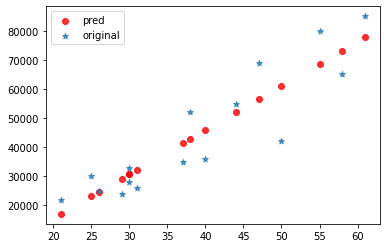

In [8]:
import seaborn as sns
X = x
sns.regplot(X, preds, fit_reg=False, color='red',label='pred')
sns.regplot(X, y, fit_reg=False, marker='*',label='original')
plt.legend()

En cuanto al error que comete el modelo en sus predicciones, las métricas más habituales para regresión son el [Mean Squared Error](scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) y el [Mean Absolute Error](scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html): 

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(round(mse,2)) + " MAE: " + str(round(mae,2)))

MSE: 71814865.44 MAE: 7209.41


### Clase LinearRegression de Scikit-learn

La clase correspondiente en Scikit-learn al método que hemos programado es [LinearRegression](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Podemos comprobar que nuestro modelo es correcto entrenando, haciendo predicciones y viendo si los resultados coinciden:

In [10]:
from sklearn.linear_model import LinearRegression
X = x.reshape((-1, 1))
olsr = LinearRegression()
olsr.fit(X, y)
preds = olsr.predict(X)

Pinta una gráfica con los datos y las predicciones:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


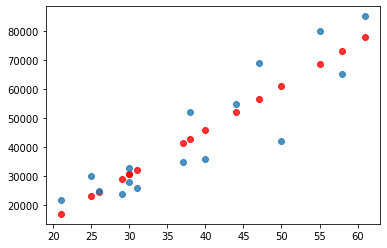

In [11]:
import seaborn as sns
sns.regplot(X, preds, fit_reg=False,color='red' )
sns.regplot(X, y, fit_reg=False)

Y calcula el MSE y el MAE:

In [12]:
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score

In [13]:
print('MSE:', mean_squared_error(y, preds))
print('MAE:', median_absolute_error(y,preds))

MSE: 71814865.44440871
MAE: 6604.856867159859


In [14]:
print('R2:',r2_score(y,preds))

R2: 0.8237249575361366


### Programación de un wrapper compatible con scikit-learn

Intenta programar una clase OLSRegressor para el método directo que sea compatible con Scikit-learn. Para ello, la clase debe heredar de las clases sklearn.base.BaseEstimator y sklearn.base.RegressorMixin.

También debe implementar un método fit(self, X, y) que calcule el beta a partir de X e y y lo guarde en un atributo self.beta_ y un método predict(self, X) que utilice el atributo self.beta_ calculado en fit para realizar predicciones a partir de la X.

In [23]:
X.shape


(16,)

In [19]:
################################################################################
################### SOLUCION ###################################################
from sklearn.base import BaseEstimator, RegressorMixin

In [24]:
class OLSRegressor(BaseEstimator, RegressorMixin):

    def fit(self, X, y):
        if len(X.shape) == 1: X = x.reshape((-1, 1))
        ones = np.ones((len(X), 1))
        X_bias = np.append(ones, X, axis=1)
        self.beta_ = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        if len(X.shape) == 1: X = x.reshape((-1, 1))
        ones = np.ones((len(X), 1))
        X_bias = np.append(ones, X, axis=1)
        return X_bias @ self.beta_

Comprueba que funciona:

In [25]:
X = x
olsr = OLSRegressor()
olsr.fit(X, y)
preds = olsr.predict(X)

Y haz una gráfica con los datos y las predicciones, y calcula el MSE y el MAE:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


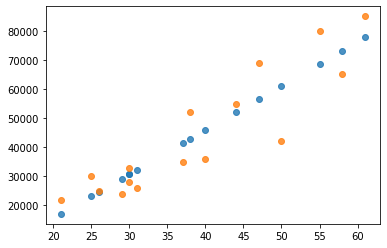

In [26]:
# Solución
import seaborn as sns
sns.regplot(X, preds, fit_reg=False)
sns.regplot(X, y, fit_reg=False)

In [27]:
# Solución
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 71814865.44440868 MAE: 7209.405489439265


Prueba ahora con el dataset de Boston Housing, que está disponible en Scikit-learn:

In [28]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
olsr = OLSRegressor()
olsr.fit(X, y)
preds = olsr.predict(X)

En este caso hay más de una variable explicativa, así que vamos a hacer la [descomposición PCA](scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de X para quedarnos sólo con una dimensión y poder pintar una gráfica:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


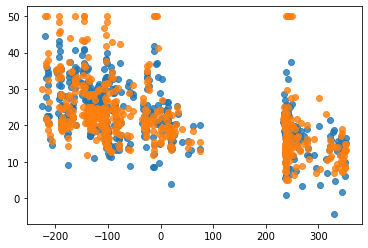

In [29]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 21.894831181729202 MAE: 3.2708628109006046


## Regresión lineal, método iterativo (SGD)

### Clase SGDRegressor

El método directo funciona y en sencillo de programar, pero tiene los problemas que se mencionan en los apuntes:
* las matrices pueden ser singulares y por tanto no tener inversa, lo que invalida el método
* si el conjunto de datos es muy grande, el coste de calcular la matriz inversa es demasiado alto
Por ello vamos a probar el método iterativo de descenso por gradiente (SGD). En Scikit-learn se corresponde con la clase [SGDRegressor](scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Carga el dataset de regresión [Boston Housing](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) e intenta entrenar y predecir con el modelo SGDRegressor:

In [31]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [32]:
# Solución
from sklearn.linear_model import SGDRegressor
lr = SGDRegressor()
lr.fit(X, y)
preds = lr.predict(X)

Como en este dataset hay más de una variable explicativa, vamos a hacer [PCA](scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de X para quedarnos sólo con una dimensión y poder pintar una gráfica:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


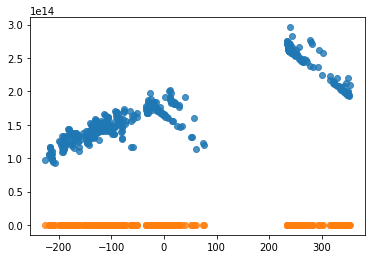

In [33]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

Las predicciones no parecen nada buenas. Veamos los errores:

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 3.2954394283084148e+28 MAE: 174577751037106.1


Esta vez los resultados son muy malos. En los apuntes se indicó que al utilzar un método basado en descenso por gradiente hay que tomar una precaución porque el método tiene mucha sensibilidad a la escala de las variables explicativas. ¿Sabrías explicar de qué precaución se trata?

In [35]:
#SOLUCION: Hay que estandarizar las variables de entrada

A continuación se resuelve el problema utilizando el preprocesador de datos apropiado:

In [36]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)
lr = Pipeline([('stds', StandardScaler()), ('sgdr', SGDRegressor())])
lr.fit(X, y)
preds = lr.predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


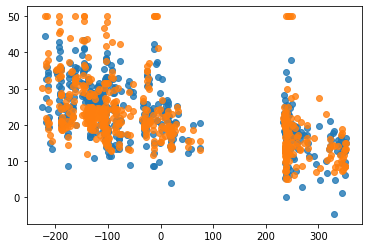

In [37]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 22.006295882572402 MAE: 3.2591443398929143


Y se puede comprobar que los resultados son correctos de nuevo.

## Regresión logística

### Clase SGDClassifier

Al igual que para regresión tenemos la clase SGDRegressor, para clasificación tenemos la clase [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Prueba a cargar los datos del dataset [Iris](scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) para clasificación (también disponibles en sklearn.datasets) y a entrenar y predecir con un modelo SGDClassifier:

In [39]:
# Solución
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_iris(return_X_y=True)
lr = Pipeline([('stds', StandardScaler()), ('sgdc', SGDClassifier())])
lr.fit(X, y)
preds = lr.predict(X)

Haz una gráfica con la primera dimensión de PCA, los targets y las predicciones del modelo, como en los ejercicios anteriores:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


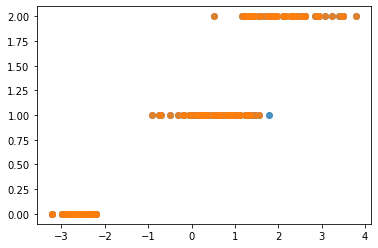

In [40]:
# Solución
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

Y utiliza la métrica accuracy_score de sklearn.metrics para ver si el resultado es bueno:

In [41]:
# Solución
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, preds)
print("Acc: " + str(acc))

Acc: 0.98


### Clase LogisticRegression

Scikit-learn también proporciona la clase [LogisticRegression](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) que cuenta con métodos de entrenamiento más avanzados, regularizadores, etc. Repite el proceso con esta nueva clase:

In [42]:
# Solución
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_iris(return_X_y=True)
lr = Pipeline([('stds', StandardScaler()), ('sgdc', LogisticRegression())])
lr.fit(X, y)
preds = lr.predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


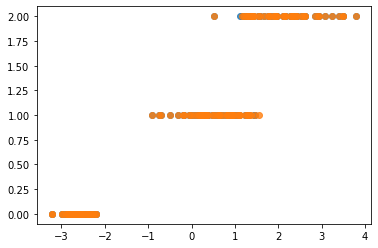

In [43]:
# Solución
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

In [44]:
# Solución
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, preds)
print("Acc: " + str(acc))

Acc: 0.9733333333333334


## Evaluación correcta del modelo

### Particiones de train y test

En los ejercicios previos hemos cometido un error metodológico importante a la hora de evaluar la calidad de los modelos: hemos calculado las métricas de error con el mismo dataset que hemos usado para entrenar. Esto puede hacer que los modelos caigan en sobreajuste y la estimación del error sea totalmente irreal. Para evitarlo, lo habitual es hacer una partición del dataset en train y test, o realizar una validación cruzada.

Scikit-learn ofrece una forma sencilla de separar train y test con la función [train_test_split](scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Entrena el modelo SGDRegressor sobre Boston Housing usando una partición de train y luego calcula MSE y MAE de sus predicciones sobre test:

In [45]:
# Solución
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = Pipeline([('stds', StandardScaler()), ('sgdr', SGDRegressor())])
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [47]:
# Solución
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 26.443559940382233 MAE: 3.6222165472870325
